# Logistic Regression

In [1]:
# perequisites 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defining all used functions first

In [2]:
def sigmoid(x):
    ans = 1/(1+np.exp(-x))
    return ans

def compute_gradient_logistic(x,y,w,b):
    z= np.dot(x,w)+b
    variable = sigmoid(z)-y
    m,n=x.shape
    dj_dw = np.matmul(x.T,variable)
    dj_db = np.sum(variable,axis=0)
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

def compute_cost_logistic(x,y,w,b):
    z= np.matmul(x,w)+b
    fx=sigmoid(z)
    m,n=x.shape
    epsilon = 1e-5
    loss = -y*np.log(fx+epsilon)-(1-y)*np.log(1-fx+epsilon )
    cost = np.sum(loss,axis =0)
    cost = cost/m
    return cost

def gradient_descent_logistic(x,y,w,b,alpha,num_iter):
    J_his=[]
    for i in range(num_iter):
        dj_dw,dj_db=compute_gradient_logistic(x,y,w,b)
        w-=alpha*dj_dw
        b-=alpha*dj_db
        cost = compute_cost_logistic(x,y,w,b)
        J_his.append(cost)
        if i%(num_iter//10)==0:
            print(f'{i}th number of itertion with cost : {cost}')
    return w,b,J_his

def oneVSall(y_t):
    y_unique = np.unique(y_t)
    y_final = np.zeros((y_t.shape[0],len(y_unique)))
    for i in range(y_t.shape[0]):
        for j in range(len(y_unique)):
            if y_t[i]==y_unique[j]:
                y_final[i][j]=1
    return y_final

def Prediction(y):
    row_wise_max_value_arr = np.amax(y,axis=1)
    m,n = y.shape
    y_prediction = []
    for i in range(m):
        for j in range(n):
            if row_wise_max_value_arr[i]==y[i][j]:
                y_prediction.append(j)
    return y_prediction

def calculate_accuracy(predictions, true_labels):
    m = predictions.shape[0]
    c=0
    for i in range(m):
        if predictions[i] == true_labels[i] :
            c+=1
    return c/m*100

def plotting_costVSnum_iter(cost,num_iter):
    plt.title("Cost VS number of iterations graph")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost (error)")
    plt.plot(np.arange(0,num_iter),cost)
    plt.show()

### Reading the data 

In [3]:
df = pd.read_csv('train_data/Classification_train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2 = df.to_numpy()
x_t = df2[:,1:]
y_train_data = df2[:,0]
x_train_data = x_t/255   #applying normalization

### Dividing the data into cross validation and training set

In [5]:
x_train = x_train_data[:25000,:]
y_trai = y_train_data[:25000]
x_cv = x_train_data[25000:]

### Using one VS rest stratergy to resolve multi-class classification problem into binary classification problem and then using simple losgistic regression to solve it

In [6]:
y_train = oneVSall(y_trai)

### Visualising the image data

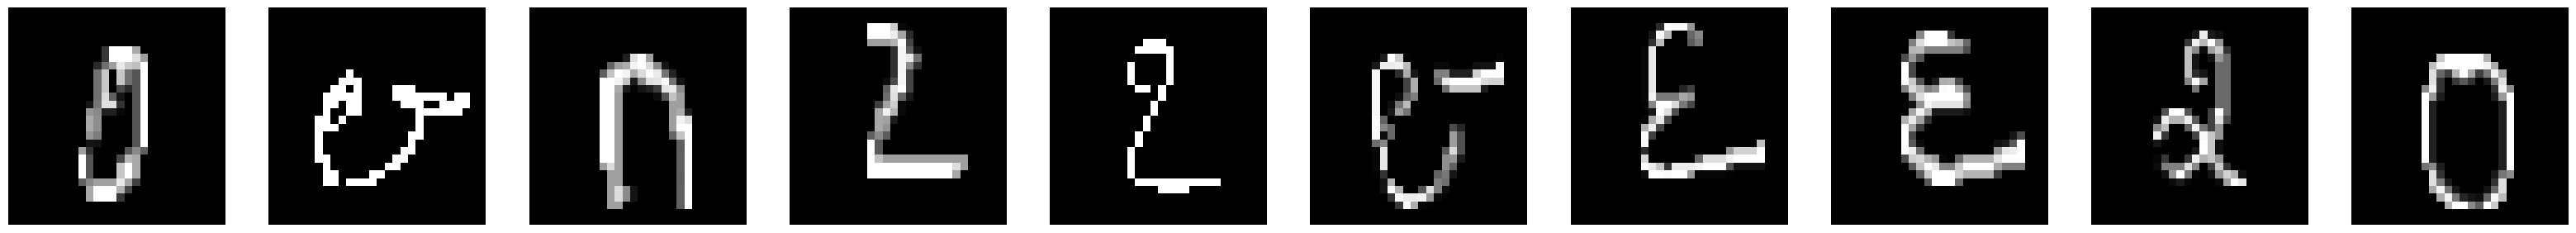

In [7]:
fig, axs = plt.subplots(1, 10, figsize=(40, 4))
for i, ax in enumerate(axs):
    ax.imshow(x_train[i, :].reshape(28, 28), cmap='gray')  
    ax.axis('off')
plt.show()

### Training the data

In [8]:
import time
s=time.time()
alpha = 5.7 #thala for a reason 
num_iter= 1000
w=np.zeros((x_train.shape[1],y_train.shape[1]))
b=np.zeros(y_train.shape[1])
w_f,b_f,cost_f=gradient_descent_logistic(x_train,y_train,w,b,alpha,num_iter)
print(f"Time Taken = {(time.time()-s)/60} mins")

0th number of itertion with cost : [1.1531244  1.15261107 1.11511026 1.1438672  1.20094777 1.15082269
 1.19170072 1.12591627 1.13652999 1.14155725]
100th number of itertion with cost : [0.03649547 0.02037985 0.00953861 0.05826292 0.02971098 0.03616095
 0.03529388 0.06231098 0.0189537  0.02198275]
200th number of itertion with cost : [0.03193071 0.01720975 0.00761615 0.05392646 0.02661375 0.02966914
 0.03243253 0.05766365 0.01603981 0.01900737]
300th number of itertion with cost : [0.02957718 0.01553998 0.00664518 0.05171182 0.02496033 0.02653514
 0.03087497 0.05525431 0.01443968 0.01746907]
400th number of itertion with cost : [0.02806017 0.01440864 0.00597556 0.05030062 0.02386244 0.02458231
 0.02979115 0.05364521 0.0133353  0.01643925]
500th number of itertion with cost : [0.02697447 0.0135573  0.00547233 0.04929185 0.02305305 0.02320194
 0.02896246 0.05246147 0.01250392 0.01567445]
600th number of itertion with cost : [0.02614607 0.01287748 0.00508086 0.04851693 0.02241794 0.0221504

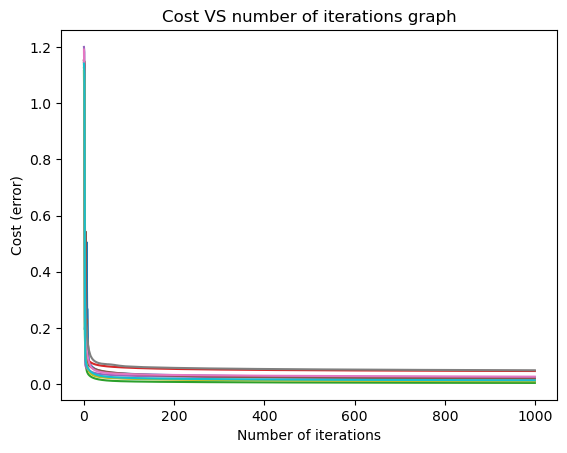

In [9]:
plotting_costVSnum_iter(cost_f,num_iter)

### Calculating accuracy 

In [10]:
z = np.dot(x_train,w_f)+b_f
y_predicted = sigmoid(z)
Final_prediction = np.array(Prediction(y_predicted))

In [11]:
calculate_accuracy(Final_prediction,y_train_data)

97.504

### Calculating accuracy of Cross validation set

In [12]:
z = np.dot(x_cv,w_f)+b_f
y_predicted = sigmoid(z)
Final_predictions = np.array(Prediction(y_predicted))
calculate_accuracy(Final_predictions,y_train_data[25000:])

96.74000000000001

# Visualising the output

Left side actual , Right side predicted values


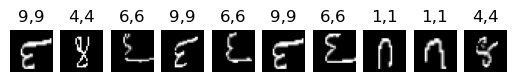

In [13]:
fig,axs = plt.subplots(1,10)
for j,ax in enumerate(axs):
    i = np.random.randint(0,25000)
    a = x_train[i,:]
    ax.imshow(a.reshape(28,28), cmap='gray')
    ax.set_title(f"{y_trai[i]},{Final_prediction[i]}")
    ax.axis('off')
print("Left side actual , Right side predicted values")

### Testing the data

In [14]:
data=pd.read_csv('test_data/Classification_test.csv')
data

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,18563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_frame = data.to_numpy()
x_tes = data_frame[:,1:]
x_test = x_tes/255
z = np.dot(x_test,w_f)+b_f
y_predicted = sigmoid(z)
y_predictions = np.array(Prediction(y_predicted))

In [16]:
final_data = np.zeros((10000,2))
final_data=np.concatenate((data_frame[:,0].reshape(-1,1),y_predictions.reshape(-1,1)),axis=1)

In [17]:
data_f = pd.DataFrame(final_data)
data_f.columns =  ["ID's", 'Predictions']

In [18]:
data_f

,ID's,Predictions
0,15795,0
1,860,4
2,5390,5
3,11964,5
4,11284,7
...,...,...
9995,11260,9
9996,18563,9
9997,634,0
9998,10057,8


In [19]:
#finaly converting dataframe to csv
data_f.to_csv('predicted_data/Logistic_prediction_final.csv' , index = False) 